## Introduction

This notebook shows how to automatically download LINZ (Land Information New Zealand) tide gauge data from https://sealevel-data.linz.govt.nz/tidegauge

## Install necessary python libraries

First install some python libraries, if not already installed in your current python environment.

In [3]:
import sys
!{sys.executable} -m pip install GitPython pandas requests xarray

### Clone github repository

Clone MetOcean storm_surge github repository to `/tmp` folder. This repository contain the python scripts necessary to download LINZ tide gauge data.

In [8]:
## TODO merge to main and remove branch from the clone command
from git import Repo

# Repo.clone_from('git@github.com:metocean/storm_surge.git', '/tmp/storm_surge')
Repo.clone_from('git@github.com:metocean/storm_surge.git', '/tmp/storm_surge', branch='linz_processing')

## Download data

Download LINZ data to a local folder, here defined as `"/tmp/linz/raw"`. The script downloads and concatenates the daily files of hourly sea level data and saves as NetCDF file. The site information/readme is saved as ascii txt file. The example bellow gets data from Auckland (AUCT) station from 1st January 2013 to 1st January 2018.

In [9]:
sys.path.append('/tmp/storm_surge/storm_surge/timeseries_processing/linz_waterlevel')
from linz_download import LINZ_Site
from datetime import datetime

# user-defined
site_name = "AUCT"
data_dir = f"/tmp/linz/raw/{site_name}"
output_file = f"{data_dir}/{site_name}_raw.nc"
readme_file = f"{data_dir}/{site_name}_readme.txt"
tstart = datetime(2013, 1, 1)
tend = datetime(2018, 1, 1)

site = LINZ_Site(site_name, tstart=tstart, tend=tend)
print('downloading data')
site.get_data()
print('saving to netcdf')
site.to_netcdf(output_file)
print('downloading readme')
site.get_readme(readme_file)

downloading data
Year:  2013
Failed downloading on /tmp/tmpubp5jlwj/AUCT_40_2013326.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013326.zip</Key><RequestId>7H0C2Z1BTVH56EF4</RequestId><HostId>bHNIzwFVBkhDQ8aspxnXZf/zZ0uwOUN99ptwcUwZdLuY9JUcyf3GyUEAGmF8Gl5KWszK3AMdcaM=</HostId></Error> 404
Failed downloading on /tmp/tmpubp5jlwj/AUCT_40_2013327.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013327.zip</Key><RequestId>7H0ACTP4BSZM72PV</RequestId><HostId>ZVoHuj7B3pqz0o33sLWthi1M7m6SzzR3FFhxIGP9FQrtA58enN/9zfsuLMDNOUNtt9IwjzwPB6o=</HostId></Error> 404
Failed downloading on /tmp/tmpubp5jlwj/AUCT_40_2013328.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_20

Failed downloading on /tmp/tmpubp5jlwj/AUCT_41_2013332.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013332.zip</Key><RequestId>Z97C2WAZEK9JA9RV</RequestId><HostId>yIAzl+A2v4jOMOlB7wYMTpuiCSyJyvRBuJO3Jg8sAxGlE1A5SbNuuOWFHuMcM5OPLMBKisxF9lo=</HostId></Error> 404
Failed downloading on /tmp/tmpubp5jlwj/AUCT_41_2013333.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013333.zip</Key><RequestId>Z97042TH65CHEY3A</RequestId><HostId>AA7oEFgKEuamfVAxx4Rwu5y7/3CusscWeXYzKl1t+COp6oUQy08PEoI6O/gPz0wNiLAGaiYGM9AqjcbWI2rlfA==</HostId></Error> 404
Failed downloading on /tmp/tmpubp5jlwj/AUCT_41_2013334.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013334.zip</Key><R

Load and plot the downloaded sea level data for both sensors.

<xarray.Dataset>
Dimensions:    (time: 2595127, sensor: 2, site: 1)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-01 ... 2017-12-31T23:59:00
  * sensor     (sensor) int64 40 41
Dimensions without coordinates: site
Data variables:
    elev       (sensor, time) float32 ...
    longitude  (site) float64 ...
    latitude   (site) float64 ...
Attributes:
    site_name:      AUCT
    location_name:  Auckland


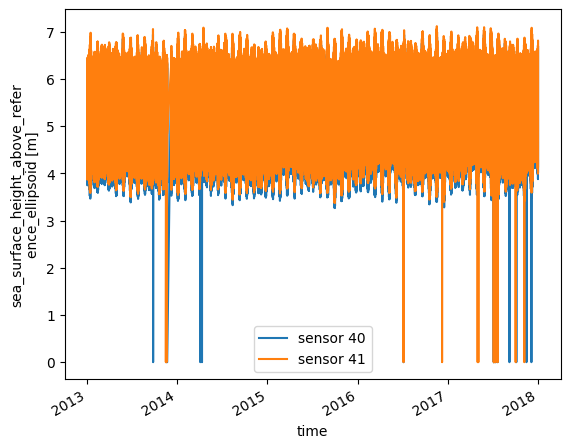

In [10]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(output_file)

print(ds)

ds.elev.sel(sensor=40, drop=True).plot(label='sensor 40');
ds.elev.sel(sensor=41, drop=True).plot(label='sensor 41');
plt.legend(loc='best');